# Part I : Quel(le) data scientist êtes-vous ?
## Contexte de l’analyse

Elu métier le plus sexy par la Harvard Business Review en octobre 2012, le data scientist représente un profil rare qui exige de nombreuses compétences.

A partir d'un dataset Aquila, vous réaliserez :
- un clustering non supervisé afin d'identifier 2 groupes de profils techniques distinctes
- une prédiction des profils dont le métier n'est pas labellisé


## Données
data.csv contient 6 variables : 
    - 'Entreprise' correspond à une liste d'entreprises fictive
    - 'Metier' correspond au métier parmi data scientist, lead data scientist, data engineer et data architecte
    - 'Technologies' correspond aux compétences maîtrisées par le profil
    - 'Diplome' correspond à son niveau scolaire (Bac, Master, PhD,...)
    - 'Experience' correspond au nombre d'années d'expériences
    - 'Ville' correspond au lieu de travail
    


## Répondez aux questions 

Bonne chance!

In [72]:
# Import des libraries classique (numpy, pandas, ...)
import pandas as pd
import numpy as np
import re
import sklearn as sk
import seaborn as sb
from matplotlib import pyplot as plt
plt.style.use('ggplot')

# 1) Importer le tableau de données dans un dataframe 

In [73]:
# Import du dataframe "data.csv"
df = pd.read_csv("data.csv")

Review data,

In [74]:
df.head(10)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,"1,5",Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux
5,S&P Global Ratings,Lead data scientist,VBA/Python/Excel/R,Master,6,Lille
6,NVIDIA,Data scientist,Excel/VBA/R/Python/PySpark,Bachelor,0,Lille
7,Cedars-Sinai Medical Center,Data scientist,Java/C/C++/R/Python,Bachelor,4,Toulouse
8,Fibroblast,Data architecte,Java/Linux/Docker,Bachelor,8,Paris
9,General Motors,Data engineer,Python/Java/Linux/GNU,Master,5,Toulouse


In [75]:
df.describe()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
count,9565,9563,9582,9582,9488,9582
unique,1382,4,57,4,21,14
top,Ball Aerospace,Data scientist,SQL/R/Python//Big data,Master,"1,5",Paris
freq,748,3865,539,4971,1023,2015


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 6 columns):
Entreprise      9565 non-null object
Metier          9563 non-null object
Technologies    9582 non-null object
Diplome         9582 non-null object
Experience      9488 non-null object
Ville           9582 non-null object
dtypes: object(6)
memory usage: 449.3+ KB


# 2) Combien y a t-il d'observations dans ce dataset? Y a t-il des valeurs manquantes? 

In [77]:
# Get number of observations in our dataset
num_observation =  df.shape[0]

In [78]:
print("============================================== QUESTION 2.1 ===================================================")

print("Il y a "+ str(num_observation) + " observations dans ce dataset.")

print("==============================================================================================================")


============================================== QUESTION 2.1 ===================================================
Il y a 9582 observations dans ce dataset.


In [79]:
# Get number of missing values in our dataset

num_miss_value = sum(df.isna().sum())

In [80]:
print("============================================== QUESTION 2.2 ===================================================")

print("Il y a " + str(num_miss_value)+" valuers manquantes.")

print("==============================================================================================================")


============================================== QUESTION 2.2 ===================================================
Il y a 130 valuers manquantes.


# 3) Réaliser l'imputation des valeurs manquantes pour la variable "Experience" avec : 
- la valeur médiane pour les data scientists
- la valeur moyenne pour les data engineers

For answering this question, we carry on 4 steps:
- Step 1: Convert string to float and convert comma separated to point separated with demical numbers.

- Step 2: Calculate the median and mean.

- Step 3: Create two lists of data scientists  and data engineers.

- Step 4: Answer Question 3.




#### Step 1: Convert string to float and convert comma separated to point separated with demical numbers,

In [81]:
df["Experience"] = df["Experience"].str.replace(',', '.').astype(float) 

See the result,

In [82]:
df.head(10)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux
5,S&P Global Ratings,Lead data scientist,VBA/Python/Excel/R,Master,6.0,Lille
6,NVIDIA,Data scientist,Excel/VBA/R/Python/PySpark,Bachelor,0.0,Lille
7,Cedars-Sinai Medical Center,Data scientist,Java/C/C++/R/Python,Bachelor,4.0,Toulouse
8,Fibroblast,Data architecte,Java/Linux/Docker,Bachelor,8.0,Paris
9,General Motors,Data engineer,Python/Java/Linux/GNU,Master,5.0,Toulouse


#### Step 2: Calculate the median and mean,

In [83]:
median_experience =  df['Experience'].median()
mean_experience = df['Experience'].mean()

See the result,

In [84]:
median_experience

2.0

In [85]:
mean_experience

2.8141863406408096

#### Step 3: Create two lists of data scientists  and data engineers,

In [86]:
les_data_scienists = ['Data scientist', 'Lead data scientist']
les_data_engineers = ['Data engineer', 'Data architecte']

#### Step 4: Answer Question 3,

Remplacer les values manquantes par la valeur médianne pour les data scientists,

In [87]:
df.loc[df['Metier'].isin(les_data_scienists) & df["Experience"].isna(),"Experience"] = median_experience

Remplacer les values manquantes par la valeur moyenne pour les data engineers,

In [88]:
df.loc[df['Metier'].isin(les_data_engineers) & df["Experience"].isna(),"Experience"] = mean_experience

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 6 columns):
Entreprise      9565 non-null object
Metier          9563 non-null object
Technologies    9582 non-null object
Diplome         9582 non-null object
Experience      9582 non-null float64
Ville           9582 non-null object
dtypes: float64(1), object(5)
memory usage: 449.3+ KB


__Comment: We see that there is no more NaN value in "Experience" column__

# 4) Combien d'années d'expériences ont, en moyenne, chacun des profils : le data scientist, le lead data scientist et le data engineer en moyenne?

In [90]:
print("===========================================QUESTION 4===========================================================")

data_scientist_exp = df[df['Metier'] == 'Data scientist']['Experience'].mean()
print("L'expérience en moyenne de data scientists est {:.0f} anneés".format(data_scientist_exp))

lead_data_scientist_exp = df[df['Metier'] == 'Lead data scientist']['Experience'].mean()
print("L'expérience en moyenne de lead data scientists est {:.0f}  anneés".format(lead_data_scientist_exp))

data_engineer_exp = df[df['Metier'] == 'Data engineer']['Experience'].mean()
print("L'expérience en moyenne de data engineers est {:.0f} anneés".format(data_engineer_exp))

print("================================================================================================================")



===========================================QUESTION 4===========================================================
L'expérience en moyenne de data scientists est 2 anneés
L'expérience en moyenne de lead data scientists est 4  anneés
L'expérience en moyenne de data engineers est 3 anneés


# 5) Faire la représentation graphique de votre choix afin de comparer le nombre moyen d'années d'expériences pour chaque métier

In [91]:
#List of experience 
annees_exp = [data_scientist_exp, lead_data_scientist_exp, data_engineer_exp] 
#List of jobs 
metiers = ['Data scientist', 'Lead data scientist', 'Data engineers']

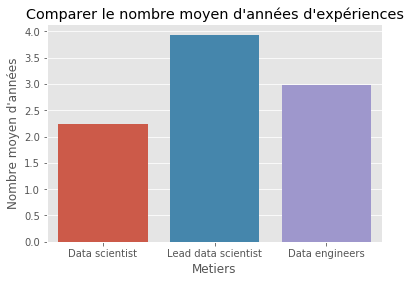

In [92]:
#Create a graph
graph_metier = sb.barplot(metiers,annees_exp)
graph_metier.set(title="Comparer le nombre moyen d'années d'expériences", 
                 xlabel='Metiers', ylabel="Nombre moyen d'années")
plt.show()


# 6) Transformer la variable continue 'Experience' en une nouvelle variable catégorielle 'Exp_label' à 4 modalités: débutant, confirmé, avancé et expert
- Veuillez expliquer votre choix du règle de transformation.  

For answering this question, we carry on 2 steps:

 - Step 1: Build a function to label 'Experience' column,

 -  Step 2: Apply the function *label_exp* to 'Experience' column by _map_ function,



#### Step 1: Build a function to label 'Experience' column,

In [93]:
def label_exp(years):
    '''
    Débutant: 0-3 années
    Confirmé: 3-5 années
    Avancé: 5-7 années
    Expert: plus que 7 années
    '''
    if years > 7:
        return 'Expert'
    elif years > 5:
        return 'Confirmé'
    elif years > 3:
        return 'Avancé'       
    else:
        return 'Débutant'

####  Step 2: Apply the function *label_exp* to 'Experience' column by _map_ function,

In [94]:
df['Experience']=df['Experience'].map(label_exp)

See the result,

In [95]:
df.head(10)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,Débutant,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,Débutant,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,Débutant,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,Débutant,Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,Débutant,Bordeaux
5,S&P Global Ratings,Lead data scientist,VBA/Python/Excel/R,Master,Confirmé,Lille
6,NVIDIA,Data scientist,Excel/VBA/R/Python/PySpark,Bachelor,Débutant,Lille
7,Cedars-Sinai Medical Center,Data scientist,Java/C/C++/R/Python,Bachelor,Avancé,Toulouse
8,Fibroblast,Data architecte,Java/Linux/Docker,Bachelor,Expert,Paris
9,General Motors,Data engineer,Python/Java/Linux/GNU,Master,Avancé,Toulouse


In [96]:
df.tail(10)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
9572,State Street,Data scientist,Excel/VBA/R/Python/PySpark,Master,Débutant,Lyon
9573,Jacobs,Data scientist,Matlab/C/C++/Python/Scikit-learn,Phd,Débutant,Bordeaux
9574,Georgia Tech Research Institute,Data architecte,MongoDB/SQL/Docker,Master,Avancé,Toulouse
9575,Hatch,Data engineer,Python/Pyspark/Spark,No diploma,Avancé,Toulouse
9576,Ra Pharmaceutical,Data scientist,R/machine learning/Excel/VBA,Phd,Débutant,Toulouse
9577,Massachusetts General Hospital(MGH),Data scientist,C++/R/Python/Matlab/Matplotlib,Master,Débutant,Lyon
9578,Charles River Analytics,Data scientist,Excel/Python/Matlab/R/machine learning/anglais,Master,Expert,Toulouse
9579,Ball Aerospace,Data scientist,R/machine learning/Excel/VBA,Master,Débutant,Paris
9580,Takeda Pharmaceutical,Data scientist,Python/Pyspark/machine learning/Microsoft Azure,Master,Expert,Rennes
9581,Vertex,Data scientist,VBA/Python/Excel/R,Phd,Débutant,Paris


# 7) Quelles sont les 5 technologies les plus utilisées? Faites un graphique

    
For answering this question, we carry on 4 steps:    
    
   - Step 1: Splitting all elements of "Technologies" column to a list.

   - Step 2: Find a list of all technologies in dataset.

   - Step 3:  Build a function to find the five most frequent elements and apply it to *list_Tech*.

   - Step 4: Answer Question 7.

#### Step1: Splitting all elements of "Technologies" column to a list

In [97]:
# Remove all the space in the strings
df['Technologies'] = df['Technologies'].str.strip()

# Lowering all the words
df['Technologies'] = df['Technologies'].str.lower()

# Splitting the string separated by slash '/',
df['Technologies'] = df['Technologies'].str.split('/')

See the result,

In [98]:
df['Technologies']

0       [matlab, python, pyspark, scikit-learn, tensor...
1                          [python, java, scala, mongodb]
2       [spss, sql, teradata, r, python, tensorflow, s...
3                                  [c, c++, java, python]
4       [matlab, python, c++, numpy, tensorflow, sciki...
                              ...                        
9577                 [c++, r, python, matlab, matplotlib]
9578    [excel, python, matlab, r, machine learning, a...
9579                    [r, machine learning, excel, vba]
9580    [python, pyspark, machine learning, microsoft ...
9581                              [vba, python, excel, r]
Name: Technologies, Length: 9582, dtype: object

#### Step 2: Find a list of all technologies in dataset

In [99]:
list_Tech = []
for i in range(df.shape[0]):
    list_Tech += df['Technologies'][i]

#### Step 3:  Build a function to find the five most frequent elements and apply it to *list_Tech*

In [100]:
# Build a function to count the five most frequent element,
def five_most_frequent(list_):
    '''    
    - This function gives back two lists of 5 most frequent elements and their occurences from input list.
    - Example:
        + Input: ['a', 'a' ,'a', 'b', 'b', 'c' ,'c', 'd','d', 'e', 'e', 'f', 'g']
        + Output:  (['a', 'b', 'd', 'e', 'c'],[3, 2, 2, 2, 2])    
    '''    
    
    
    list_item, list_count = [] , [] # create two empty lists to store list of 5 most frequent elements and their occurences
    set_unique_elements = set(list_) # create a set to store all unique elemnts of input list
    # Find 5 most frequent elements
    for i in range(5):       
        count, item = 0, ''  
        # Find the most frequent element
        for j in set_unique_elements:
            if list_.count(j) > count:
                count = list_.count(j)
                item = j
        # Append the most element and its occurence to our ouput lists
        list_item.append(item)
        list_count.append(count)
        # Remove the recently most frenquent element from the set to looking for the next "The most frequent" element 
        set_unique_elements.remove(item) 
    return list_item, list_count


# Apply the function five_most_frequent to list_Tech,
techs, counts = five_most_frequent(list_Tech)


#### Step 4: Answer Question 7:

In [101]:
print("======================================== Question 7 =======================================")
print('Les 5 technologies les plus utilisées sont '+', '.join(techs)+'.')
print("===========================================================================================")

======================================== Question 7 =======================================
Les 5 technologies les plus utilisées sont python, r, sql, java, hadoop.


Make a graph that describes 5 most used technologies,

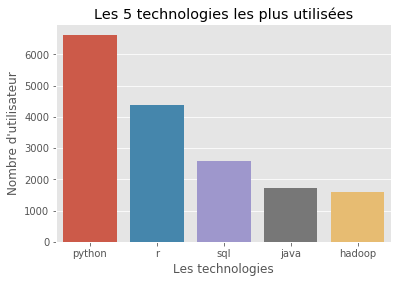

In [102]:
graph_tech = sb.barplot(techs,counts)
graph_tech.set(title="Les 5 technologies les plus utilisées", 
                 xlabel='Les technologies', ylabel="Nombre d'utilisateur")
plt.show()


# 8) Réaliser une méthode de clustering non supervisée de votre choix pour faire apparaître 2 clusters que vous jugerez pertinents. Donnez les caractéristiques de chacun des clusters.
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

   
For answering this question, we carry on 5 steps:
      
   - Step 1: One Hot Encode the "Technologies" column to a new dataframe named *df_Tech*.

   - Step 2: Apply the methods PCA and Kernel-PCA to reduce the dimension of dataframe *df_Tech* to 2-D  data.

   - Step 3: Compute distances of all observations to each centroids.

   - Step 4: Build a function to get all features of n neareast observations to the centroid.

   - Step 5: Answer Question 8.

### Step 1: One Hot Encode the "Technologies" column to a new dataframe named *df_Tech*

In [103]:
df_Tech = df['Technologies'].str.join('|').str.get_dummies()

See the result,

In [104]:
df_Tech.head()

,ai,anglais,aws,big data,c,c++,cassandra,deep learning,docker,elasticsearch,...,spark,spss,sql,tableau,tensorflow,teradata,vba,vertica,windows,yarn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Step 2: Apply the method Kernel-PCA to reduce the dimension of dataframe *df_Tech* to 2-D  data:

#### 2.1 Import the libraries for K-Means and Kernel PCA models,

In [105]:
from sklearn.cluster import KMeans
from sklearn.decomposition import KernelPCA

#### 2.2 __Create dataset *X_Tech* that gets values from dataframe *df_Tech*,__

In [106]:
X_Tech = df_Tech.values

#### 2.3 Apply Kernel PCA  and K-means in 2D to *X_Tech*,

In [107]:
#Fitting Kernel PCA to our dataset X_Tech,
kpca = KernelPCA(n_components = 2, kernel ='rbf')#'rbf': Gaussian kernel 
X_Tech_to_2d = kpca.fit_transform(X_Tech)

In [108]:
# Fitting k-means model to X_Tech_to_2d,
kmeans = KMeans(n_clusters=2, init= 'k-means++',  max_iter=300, \
                                                    n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_Tech_to_2d)

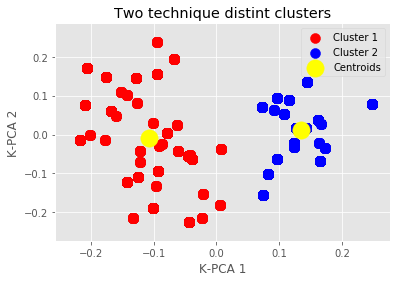

In [109]:
#Plotting two clusters of dataset X_Tech_to_2d and their centroids,
plt.scatter(X_Tech_to_2d[y_kmeans == 0,0], X_Tech_to_2d[y_kmeans == 0,1 ],\
                                        s=100, c = 'red',  label = 'Cluster 1')
plt.scatter(X_Tech_to_2d[y_kmeans == 1,0], X_Tech_to_2d[y_kmeans == 1,1 ],\
                                        s=100, c = 'blue',  label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],\
                                        s=300, c = 'yellow',  label = 'Centroids')

plt.xlabel('K-PCA 1')
plt.ylabel('K-PCA 2')
plt.title('Two technique distint clusters')
plt.legend()

plt.show()


__Comment:__ We see that two clusters is separated clearly.  For deriving their characteristics, we will find the common features of the points that are not quite far from the centroids. See the 3 following steps.

### Step 3: Compute distances of all observations to each centroids

In [110]:
#Distance from all points in dataset X_Tech_to_2d to 1st centroid  
distance_to_1st_centroid = kmeans.transform(X_Tech_to_2d)[:,0]
#Distance from all points in dataset X_Tech_to_2d to 2nd centroid  
distance_to_2nd_centroid = kmeans.transform(X_Tech_to_2d)[:,1]

### Step 4: Build a function to get all features of n neareast observations to the centroid

In [111]:
def tech_characteristic_of_cluster(df_,n,distance_to_centroid):
    '''
    This function is to find technique characteristic of one cluster , i.e, 
    deriving all features (techonologies in our case) of n nearest observations to the centroid  from dataframe df_.
    
    - INPUT
        df_:Dataframe contains dataset
        n: number of nearest points to centroid
        distance_to_centroid: distance from to a centroid to all observations in dataset
    - OUT
        characteristic: List of features
        len(characteristic): Number of features.
    '''
    
        
    #Index of n nearest points to the centroid
    ind_n_nearest_to_centroid = np.argsort(distance_to_centroid)[::-1][:n]
    
    #Get index of non-zero columns
    list_index_tech_cluster=\
        [k for k,j in enumerate(sum(df_.iloc[list(ind_n_nearest_to_centroid)].values)) if j != 0]
    
    # Get names of non-zero columns 
    characteristic  = list(df_.columns[list_index_tech_cluster])
    return  characteristic, len(characteristic)
    

### Step 5: Answer Question 8:

#### 5.1 Get characteristic of Cluster 1. 

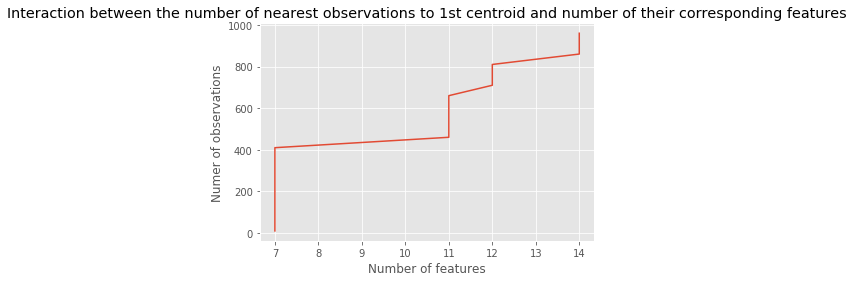

In [112]:
# Create a list  of number of observations
num_observation_cluster_1 = np.arange(10,1000,50)

# Get a list of  number of features (technologies)  from the function tech_characteristic_of_cluster
num_feature_cluster_1 = [tech_characteristic_of_cluster(df_Tech,j,distance_to_1st_centroid)[1]\
                         for j in list(num_observation_cluster_1)]

#Plot two lists to see their interaction
plt.plot(num_feature_cluster_1,num_observation_cluster_1)
plt.xlabel('Number of features')
plt.ylabel('Numer of observations')
plt.title('Interaction between the number of nearest observations to 1st centroid and number of their corresponding features')
plt.show()


__Comment:__  From the above graph, at the number of observations 400, it is broken suddenly. So we choose 400 for number of observations to get the characteristic of Cluster 1.  

In [113]:
print('========================================ANSWER QUESTION 8=====================================================')

print('Les characteristics du cluster 1 sont ' + ', '.join(tech_characteristic_of_cluster(df_Tech,400,distance_to_1st_centroid)[0])+'.') 


print('==============================================================================================================')


========================================ANSWER QUESTION 8=====================================================
Les characteristics du cluster 1 sont anglais, machine learning, python, r, sas, sql, teradata.


#### 5.2 Get characteristic of Cluster 2. 

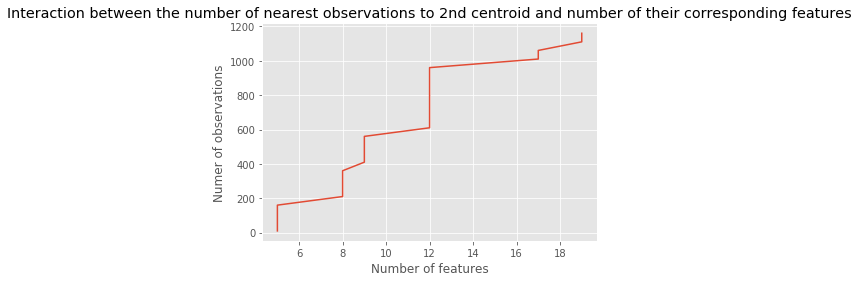

In [114]:
# Create a list  of number of observations
num_observation_cluster_2 = np.arange(10,1200,50)

# Get a list of  number of features  from the function tech_characteristic_of_cluster
num_feature_cluster_2 = [tech_characteristic_of_cluster(df_Tech,j,distance_to_2nd_centroid)[1]\
                         for j in list(num_observation_cluster_2)]

#Plot two lists to see their interaction
plt.plot(num_feature_cluster_2,num_observation_cluster_2)
plt.xlabel('Number of features')
plt.ylabel('Numer of observations')
plt.title('Interaction between the number of nearest observations to 2nd centroid and number of their corresponding features')
plt.show()


__Comment:__  From the above graph, at the number of observations 180, it is broken suddenly. Therefore, we choose 180 for number of observations to get the characteristic of Cluster 2 . 

In [115]:
print('========================================ANSWER QUESTION 8=====================================================')

print('Les characteristics du cluster 2 sont ' + ', '.join(tech_characteristic_of_cluster(df_Tech,180,distance_to_2nd_centroid)[0])+'.') 


print('==============================================================================================================')


========================================ANSWER QUESTION 8=====================================================
Les characteristics du cluster 2 sont docker, elasticsearch, kibana, mongodb, postgresql.


# 9) Réaliser la prédiction des métiers manquants dans la base de données par l'algorithme de votre choix
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

For answering this question, we carry on 9 steps:
 
   - Step 1: Create a new dataframe containing the important columns from dataframe _df_.

   - Step 2: One Hot Encode 'Experience' column.

   - Step 3: Label Encode "Metier" column.

   - Step 4:  Splitting the new dataframe to training and test dataframe.

   - Step 5: Splitting dataset to independent and dependent variables.

   - Step 6: Split data into train and validation sets.

   - Step 7: Feature Scaling.

   - Step 8: Fitting classification models to training set, predict on validation set.
   
   - Step 9: Answer Question 9.

### Step 1: Create a new dataframe containing the important columns from dataframe *df*,

Create a new dataframe that contains the columns 'Technologies','Experience' and 'Metier'. With 'Technologies' column, we use the one hot encode df_Tech in Question 8.

In [214]:
df_new = pd.concat([df_Tech, df[['Experience','Metier']]],axis=1)

See the result,

In [215]:
df_new.head()

,ai,anglais,aws,big data,c,c++,cassandra,deep learning,docker,elasticsearch,...,sql,tableau,tensorflow,teradata,vba,vertica,windows,yarn,Experience,Metier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,Débutant,Data scientist
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Débutant,Data architecte
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,Débutant,Lead data scientist
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Débutant,Data scientist
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,Débutant,Data scientist


### Step 2: One Hot Encode 'Experience' column,

In [216]:
#One-hot encode the 'Experience' column
df_new = pd.concat([pd.get_dummies(df_new['Experience'], prefix='',prefix_sep=''),df_new],axis=1)
#Drop "Experience" column
df_new.drop(['Experience'],axis = 1, inplace= True)

###  Step 3: Label Encode "Metier" column,

In [217]:
replacement_Metier = {'Data scientist': 1,
                      'Lead data scientist': 1,
                      'Data engineer': 2,
                      'Data architecte':3}
df_new['Metier'].replace(replacement_Metier,inplace =True)

See the result,

In [248]:
df_new.head()

,Avancé,Confirmé,Débutant,Expert,ai,anglais,aws,big data,c,c++,...,spss,sql,tableau,tensorflow,teradata,vba,vertica,windows,yarn,Metier
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1.0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0
2,0,0,1,0,0,0,0,0,0,0,...,1,1,0,1,1,0,0,0,0,1.0
3,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1.0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1.0


### Step 4:  Splitting the new dataframe to training and test dataframe,

In [249]:
# Get all observations that are null at the 'Metier' column,
df_test = df_new[df_new['Metier'].isna()]

In [250]:
# Drop all observations that are null at the 'Metier' column, (this also means dropping df_test)
df_train = df_new.dropna()

See the result,

In [251]:
df_train.head()

,Avancé,Confirmé,Débutant,Expert,ai,anglais,aws,big data,c,c++,...,spss,sql,tableau,tensorflow,teradata,vba,vertica,windows,yarn,Metier
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1.0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0
2,0,0,1,0,0,0,0,0,0,0,...,1,1,0,1,1,0,0,0,0,1.0
3,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1.0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1.0


In [252]:
df_test.head()

,Avancé,Confirmé,Débutant,Expert,ai,anglais,aws,big data,c,c++,...,spss,sql,tableau,tensorflow,teradata,vba,vertica,windows,yarn,Metier
346,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2058,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,NaN
2670,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,NaN
2899,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,NaN
3346,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


###  Step 5: Splitting dataset to independent and dependent variables, 

In [253]:
X = df_train.iloc[:,:-1].values
X_test = df_test.iloc[:,:-1].values # To predict the NaN positions in the column 'Metier'
y = df_train.iloc[:,-1].values

### Step 6: Split data into train and validation sets

In [224]:
from sklearn.model_selection import train_test_split

In [225]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state = 0)

### Step 7: Feature Scaling

In [226]:
from sklearn.preprocessing import StandardScaler

In [227]:
sc_X = StandardScaler()

In [228]:
X_train = sc_X.fit_transform(X_train)

In [229]:
X_train.shape

(7650, 60)

In [230]:
y_val.shape

(1913,)

In [231]:
from tensorflow.keras.utils import to_categorical
y_val_binary = to_categorical(y_val)

In [232]:
y_val_binary

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [233]:
X_val = sc_X.fit_transform(X_val)

### Step 8: Fitting classification models to training set, predict on validation set

In [132]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, log_loss

#### 1. Logistic Regression

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy by logistic regression: 0.9947726084683742
Recall by logistic regression: 0.9932573044538495
Precision by logistic regression: 0.9952520873474632


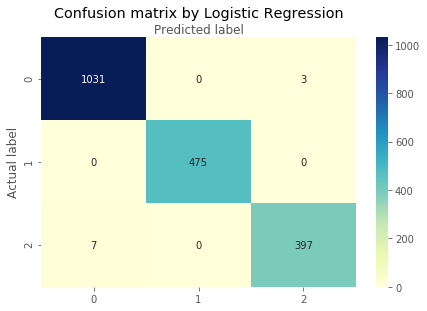

In [234]:
from sklearn.linear_model import LogisticRegression

classifier_log = LogisticRegression(random_state = 0)
classifier_log.fit(X_train,y_train)
y_pred_log =  classifier_log.predict(X_val)
print('Accuracy by logistic regression: '+ str(accuracy_score(y_val,y_pred_log)))
print('Recall by logistic regression: '+ str(recall_score(y_val,y_pred_log,average='macro')))
print('Precision by logistic regression: '+ str(precision_score(y_val,y_pred_log,average='macro')))

# Create a heatmap
class_names=[0, 1, 2, 3] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sb.heatmap(pd.DataFrame(confusion_matrix(y_val,y_pred_log)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix by Logistic Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#### 2. SVM

Accuracy by SVM: 0.9947726084683742
Recall by SVM: 0.9932573044538495
Precision by SVM: 0.9952520873474632


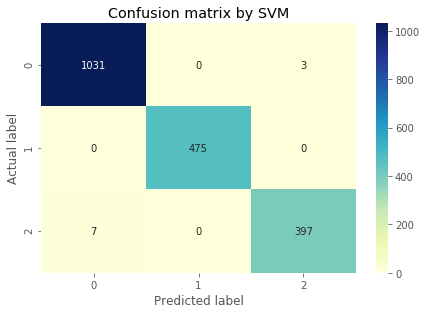

In [235]:
from sklearn.svm import SVC 
classifier_SVM = SVC(C=1.,kernel= 'linear',random_state=0)
classifier_SVM.fit(X_train,y_train)
y_pred_SVM =  classifier_SVM.predict(X_val)
print('Accuracy by SVM: '+ str(accuracy_score(y_val,y_pred_SVM)))
print('Recall by SVM: '+ str(recall_score(y_val,y_pred_SVM,average='macro')))
print('Precision by SVM: '+ str(precision_score(y_val,y_pred_SVM,average='macro')))

# Create a heatmap
sb.heatmap(pd.DataFrame(confusion_matrix(y_val,y_pred_SVM)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix by SVM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#### 3. Kernel-SVM

Accuracy by Kernel-SVM: 0.9942498693152118
Recall by Kernel-SVM: 0.9909240924092408
Precision by Kernel-SVM: 0.9964912280701754


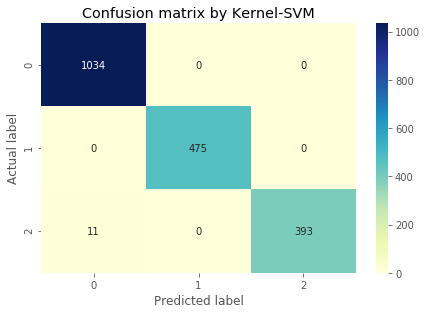

In [263]:
from sklearn.svm import SVC #support vector classifier
classifier_kSVM = SVC(C=1.,kernel= 'rbf',random_state=0)
classifier_kSVM.fit(X_train,y_train)
y_pred_kSVM =  classifier_kSVM.predict(X_val)
print('Accuracy by Kernel-SVM: '+ str(accuracy_score(y_val,y_pred_kSVM)))
print('Recall by Kernel-SVM: '+ str(recall_score(y_val,y_pred_kSVM,average='macro')))
print('Precision by Kernel-SVM: '+ str(precision_score(y_val,y_pred_kSVM,average='macro')))

# Create a heatmap
sb.heatmap(pd.DataFrame(confusion_matrix(y_val,y_pred_kSVM)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix by Kernel-SVM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#### 4. Naive Classification

Accuracy by Naive classification : 0.8269733403031887
Recall by  Naive classification: 0.7606895952753171
Precision by  Naive classification: 0.836815006557185


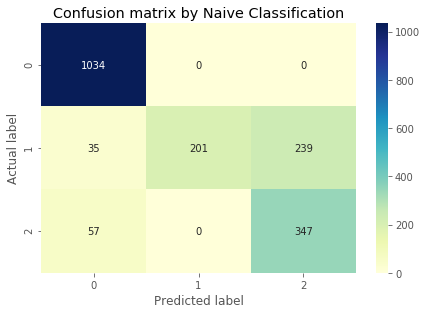

In [265]:
from sklearn.naive_bayes import GaussianNB
classifier_naive = GaussianNB()
classifier_naive.fit(X_train,y_train)
y_pred_naive =  classifier_naive.predict(X_val)
#cm_log = confusion_matrix(y_val,y_pred_log)
print('Accuracy by Naive classification : '+ str(accuracy_score(y_val,y_pred_naive)))
print('Recall by  Naive classification: '+ str(recall_score(y_val,y_pred_naive,average='macro')))
print('Precision by  Naive classification: '+ str(precision_score(y_val,y_pred_naive,average='macro')))

# Create a heatmap

sb.heatmap(pd.DataFrame(confusion_matrix(y_val,y_pred_naive)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix by Naive Classification', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#### 5. Decision Tree Classification

Accuracy by Decision Tree classification : 0.9947726084683742
Recall by  Decision Tree classification: 0.9932573044538495
Precision by  Decision Tree classification: 0.9952520873474632


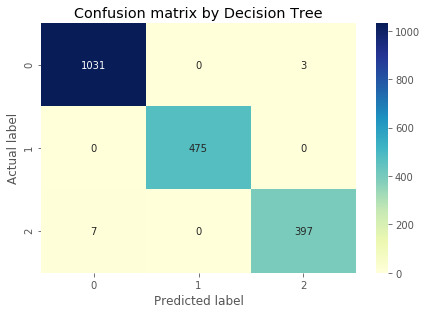

In [266]:
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier_DT.fit(X_train,y_train)
y_pred_DT =  classifier_DT.predict(X_val)
#cm_log = confusion_matrix(y_val,y_pred_log)
print('Accuracy by Decision Tree classification : '+ str(accuracy_score(y_val,y_pred_DT)))
print('Recall by  Decision Tree classification: '+ str(recall_score(y_val,y_pred_DT,average='macro')))
print('Precision by  Decision Tree classification: '+ str(precision_score(y_val,y_pred_DT,average='macro')))

# Create a heatmap
sb.heatmap(pd.DataFrame(confusion_matrix(y_val,y_pred_DT)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix by Decision Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#### 6.Radom Forest Classification

Accuracy by Radom Forest classification : 0.9947726084683742
Recall by  Radom Forest classification: 0.9932573044538495
Precision by  Radom Forest classification: 0.9952520873474632


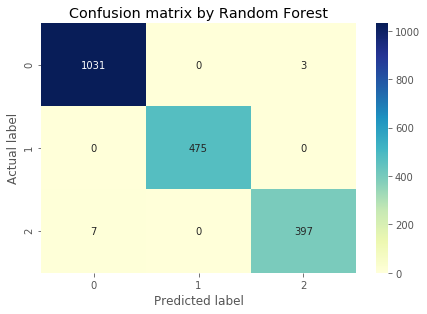

In [267]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier_RF.fit(X_train,y_train)
y_pred_RF =  classifier_RF.predict(X_val)
#cm_log = confusion_matrix(y_val,y_pred_log)
print('Accuracy by Radom Forest classification : '+ str(accuracy_score(y_val,y_pred_RF)))
print('Recall by  Radom Forest classification: '+ str(recall_score(y_val,y_pred_RF,average='macro')))
print('Precision by  Radom Forest classification: '+ str(precision_score(y_val,y_pred_RF,average='macro')))

# Create a heatmap

sb.heatmap(pd.DataFrame(confusion_matrix(y_val,y_pred_RF)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix by Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#### 7. KNN Classification

Accuracy by K-NN: 0.9942498693152118
Recall by  K-NN: 0.9924322219455988
Precision by  K-NN: 0.994545541571258


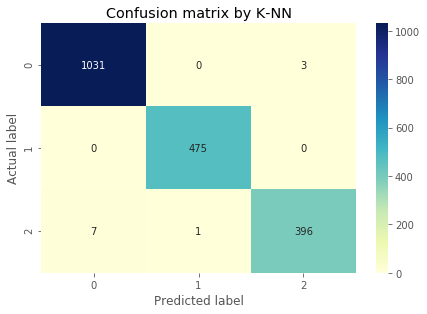

In [268]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn =  KNeighborsClassifier(n_neighbors=5,metric = 'minkowski',p=3)
classifier_knn.fit(X_train,y_train)
y_pred_knn =  classifier_knn.predict(X_val)
#cm_log = confusion_matrix(y_val,y_pred_log)
print('Accuracy by K-NN: '+ str(accuracy_score(y_val,y_pred_knn)))
print('Recall by  K-NN: '+ str(recall_score(y_val,y_pred_knn,average='macro')))
print('Precision by  K-NN: '+ str(precision_score(y_val,y_pred_knn,average='macro')))

# Create a heatmap
sb.heatmap(pd.DataFrame(confusion_matrix(y_val,y_pred_knn)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix by K-NN', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

__Comment:__ Although we got the accuracy 88,5% by K-NN model, the recall of class 1 (Lead data scientist) is just $\frac{78}{175+78+1}=0.31$. Even I tried to remove the 'Experience' column or add the feature 'Diplome', the result is not almost changed. 

   From the confusion matrix of K-NN prediction, we see that almost actual Lead data scientists (class 1) are predicted to Data scientist (class 0). This means that two groups of Data scientist and Lead data scientist are not really separated. In other words, they have almost the same principle chacracteristics.
   
   I propose two solutions:
        1. Group 'Data scientist' (class 0) and Lead Data scientist (class 1) together and predicting on 3 classes of job (Data scientist, Data Engineer and Data architecte).
        2. Add more features to our data. (Ex: Skills, education(major, school),...).

### Step 9: Answer Question 9,

In [213]:
print('Accuracy by ANN: '+ str(accuracy_score(y_val,y_pred_ann)))
print('Recall by  ANN: '+ str(recall_score(y_val,y_pred_ann,average='macro')))
print('Precision by  ANN: '+ str(precision_score(y_val,y_pred_ann,average='macro')))

Accuracy by ANN: 0.8849973863042342
Recall by  ANN: 0.8119084743119982
Precision by  ANN: 0.8702052360867508


From the accuracies of the 7 above models, we choose K-NN for predicting the missing values in the 'Metier' column in the dataframe *df_test*,

In [257]:
y_test = classifier_knn.predict(X_test)

In [258]:
y_test

array([3., 1., 1., 3., 3., 3., 3., 3., 3., 1., 1., 3., 1., 3., 3., 3., 1.,
       1., 3.])

Filling *y_test* to  NaNs in df_test,

In [259]:
df_test['Metier'] = y_test

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


See our result,

In [260]:
df_test

,Avancé,Confirmé,Débutant,Expert,ai,anglais,aws,big data,c,c++,...,spss,sql,tableau,tensorflow,teradata,vba,vertica,windows,yarn,Metier
346,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0
2058,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.0
2670,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1.0
2899,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3.0
3346,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0
4248,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,3.0
4290,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,3.0
4292,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,3.0
5425,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0
5593,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1.0


Decode 'Metier' column back to list of jobs, 

In [261]:
df_test['Metier'].replace({1.0: 'Data scientist',
                 #1.0: 'Lead data scientist',
                 2.0: 'Data engineer',
                 3.0: 'Data architecte'},inplace = True)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6788: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


See the result,

In [262]:
df_test

,Avancé,Confirmé,Débutant,Expert,ai,anglais,aws,big data,c,c++,...,spss,sql,tableau,tensorflow,teradata,vba,vertica,windows,yarn,Metier
346,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Data architecte
2058,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Data scientist
2670,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,Data scientist
2899,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Data architecte
3346,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Data architecte
4248,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Data architecte
4290,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,Data architecte
4292,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,Data architecte
5425,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Data architecte
5593,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,Data scientist


# 10) Décrire de façon détaillée les différentes étapes pour mener à bien un projet data complexe.

Dans le cadre d’une campagne de recrutement vous avez reçu un ensemble de cv qui ne sont pas à jour (le poste actuel n’est pas présent). Deux exemple de CV vous sont donnés en pièce jointe (il n'y a pas de mise en page type). Tous les CV sont au format PDF.

On souhaite connaitre le poste actuel de chaque candidat.

-  Quelles sont les différentes étapes nécessaires à la réalisation d'un tel projet?
-  Pour chaque étape, détaillez les taches à accomplir, les méthodes à suivre, les pistes possibles, les points critiques.
-  Justifiez consciencieusement vos choix


## Answer question 10:

Je vais réaliser ce projet par 4 étapes en dessous:
 - Etape 1: Text Extraction
 - Etape 2: Preprocessing
 - Etape 3: Information Extraction
 - Etape 4: Knowledge
 
Pour leurs détailes, s'il vous plait, lisez les parties suivantes.

### Step 1: Text Extraction (Information Retrieval)
- Task: Use OCR tools/models to cover PDF format files to text files.
- There are some popular methods for this task: 
    + Texttract.
    + Tesseract (Google).
    + PDFMiner.
- Comment: I prefer Tesseract Version 4. It is combined to LSTM model. This helps us avoid to misunderstand since the semantic problem.

### Step 2: Preprocessing
    - Task: Finding features in CVs (Skills, Experience, Technologies, Company, Education,...) and create a dataframe that is input of next step (Information Extraction).
    - I process this step by the following smaller steps:
        + Step 2.1 - Tokenization: Chopping a character sequence in CVs up into pieces called Tokens.
        + Step 2.2 - Lemmatization:  Converting a word to its base form.
        + Step 2.3 - Identify stopwords: Removing the common words in CVs.
        + Step 2.4 - Word Embedding: Mapping all words of a sentence to a vector of real number.
    - Comment: 
        + I prefer nltk for the first tree steps.
        + For step 2.4, the most popular for word embedding is Word2Vec. Some state-of-the-art models of Word2Vec:
              * Bag of word.
              * Skip Gram.
              * Facebook's Fasttext .
              * GloVe (Global Vectors). 
              * ELMo (Embeddings from Language Models).
              * Google's BERT (Bidirectional Encoder Representations from Transformers).
         + This step is the most important in this project because all we need here is data. Garbage in, garbage out! 

### Step 3: Information Extraction
    - Task: Using Machine Learning techniques to find the needed features and its correlation. From this, we separate our CV's dataset to some suitable groups.
    - I process this step by the following smaller steps:
        + Step 3.1 - Clustering: Groupping CVs which has similar contents (I prefer K-means for this task).
        + Step 3.2 - Association Rule:  Finding the underlying relations between different features in CVs.
        + Step 3.3 - Visualization:  Visualizing the different clusters on the same graph (PCA, LDA can be used for demensionality reduction if needed). 
        + Step 3.4 - Terms Frequency: Extracting characteristics of each CV group, i.e, finding the common features of each cluster.
     - Comment: This step requires quite of text mining techniques. For me, the step 3.3 is the most important in the step of information extraction. From the graph of clusters, we have a better view about our dataset. Therefore, we can properly choose frequent features of each CV group in next step.

### Step 4: Knowledge
    - Task: From the characteristics of each group of CVs, we label them to corresponding job.
    - This job requires your experience and your requirements for each position. 
    - Comment: From now, you can label all your CVs which do not contain job titles.

The difficulties:
     1. How to choose visualize the data for knowing if  two clusters are clearly separated.
     2. How to choose the characteristic  of each clutser.(How to choose the correct frequent used technologies)
     3. For the classification problem, how to choose correct features for input of classification model. 
     4. Check if 4 groups corresponding to (correspond à) 4 jobs are separated. Si non, what we have to do.